Welcome to my first kaggle notebook, where I participate in "Titanic - Machine Learning from Disaster" competition. You can see my analysis and predictions below. Any comments are welcome!
# 1. The challenge 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1.1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Import train and test data

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# 2. Exploratory data analysis

Things covered in EDA chapter:
1. Inspect first rows of datasets
1. Meaning of the variables - Data Dictionary
1. Inspect descriptive statistics of datasets
1. Checking if datasets consist any missing values
1. Numerical features histograms
1. Correlation matrix heatmap for numerical values
1. Average feature values depending on survival
1. Survivorship depending on age and fare
1. Count plots for categorical features

### Inspect shapes of datasets

In [3]:
print('Shape of train dataset: {}'.format(df_train.shape))
print('Shape of test dataset: {}'.format(df_test.shape))

Shape of train dataset: (891, 12)
Shape of test dataset: (418, 11)


## 2.1. Inspect first rows of dataset

In [4]:
df_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2.2. Meaning of the variables - Data Dictionary

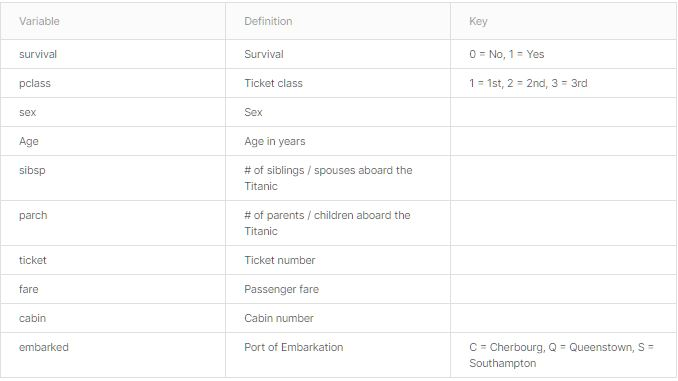

## 2.3. Inspect descriptive statistics of datasets

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


We can see that train and test datasets are well distributed (like splitting using stratification). Corresponding values in upper description tables are similar (e.g. mean of Age is around 30).

## 2.4. Checking if datasets consist any missing values

#### Train dataset

In [7]:
print("Train dataset consist missing values: " + str(df_train.isnull().values.any()))
print("Number of missing values: " + str(df_train.isnull().sum().sum()))

print("\n{}".format(df_train.isnull().sum()))

Train dataset consist missing values: True
Number of missing values: 866

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Test dataset

In [8]:
print("Train dataset consist missing values: " + str(df_test.isnull().values.any()))
print("Number of missing values: " + str(df_test.isnull().sum().sum()))

print("\n{}".format(df_test.isnull().sum()))

Train dataset consist missing values: True
Number of missing values: 414

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Inspect numerical and categorical features separately

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

## 2.5. Numerical features histograms

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

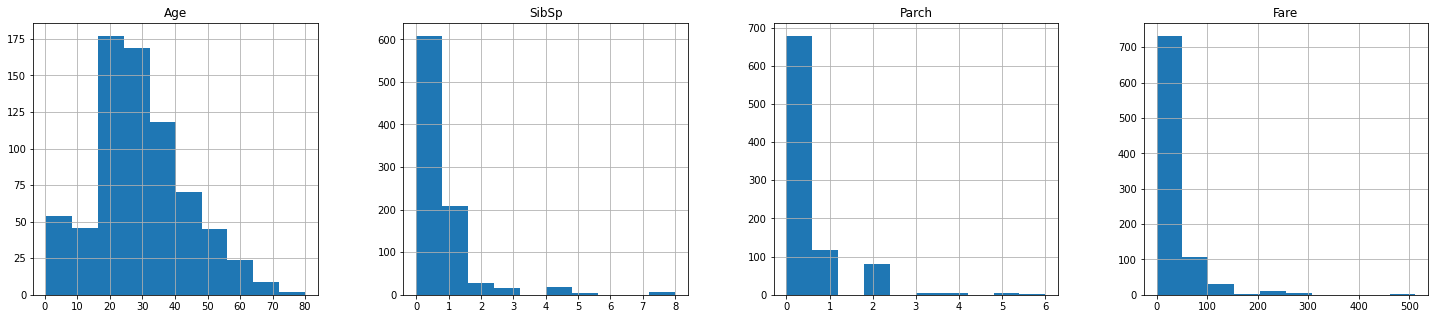

In [11]:
df_num.hist(figsize=(25,5), layout=(1,4))

## 2.6. Correlation matrix heatmap for numerical values

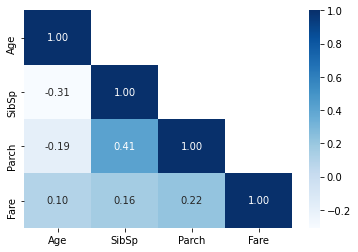

In [12]:
corr = df_num.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

sns.heatmap(corr, mask=mask, cmap='Blues', annot=True, fmt=".2f")
plt.show()

It looks like there is no really strong correlation between numerical features. There is no reproduction of any information.

**Strongest one is correlation of SibSp** (number of siblings/spouses aboard the Titanic) **with ParCh** (numbert of parents/children aboard the Titanic), which is understandable. Families tend to travel together.

**Second strongest correlation is negative correlation between SibSp and Age**. It means it's more likely to travel with sibling or spouse if you're young.

## 2.7. Average feature values depending on survival

In [13]:
pd.pivot_table(df_train, index='Survived', values=df_num.columns, aggfunc='mean')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


**Age**: We can see that people who survived tends to be younger than ones who didn't. 

**Fare**: They also statistically paid twice as much for their tickets.

**ParCh**: Survivors were more likely to travel with parents or childrens.

**SibSp**: Interesting statistic is that people travelling with siblings or spouse had lower percent of surviving.

## 2.8. Survivorship depending on age and fare

<AxesSubplot:xlabel='Age', ylabel='Fare'>

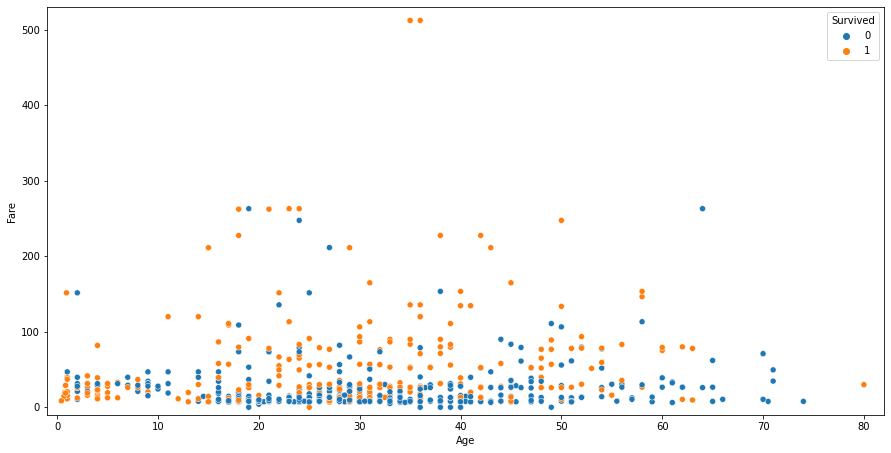

In [14]:
plt.figure(figsize=(15,7.5))
plt.ylim(-10, 530)
plt.xlim(-1, 82)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)

From this plot we can see tendencies that young people (under 10 years old) and people who paid more for their tickets, tend to survive more often.

## 2.9. Count plots for categorical features

### Count survivorship

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

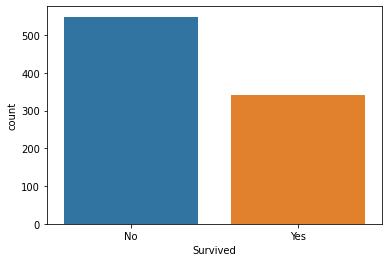

In [15]:
count_survivorship_plot = sns.countplot(x='Survived', data=df_cat)
count_survivorship_plot.set_xticklabels(['No','Yes'])

Most people didn't survive Titanic disaster

### Count survivorship by ticket class

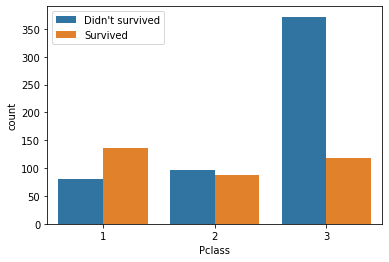

In [16]:
count_class_plot = sns.countplot(x='Pclass', hue='Survived', data=df_cat)
count_class_plot.legend(["Didn't survived", 'Survived'])

People with higher class tickets has greater chance of surviving. Especially big difference is when changing class from the cheapest to medium.

### Count survivorship by gender

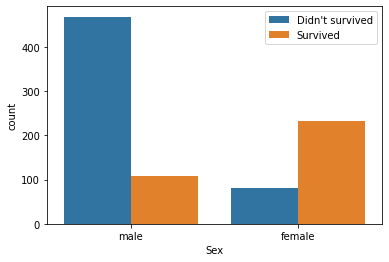

In [17]:
count_gender_plot = sns.countplot(x='Sex', hue='Survived', data=df_cat)
count_gender_plot.legend(["Didn't survived", 'Survived'])

As we can expect, women have much greater survivorship rate than men.

### Count survivorship by embarking location

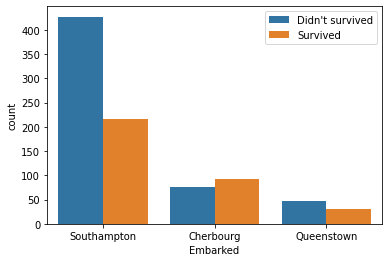

In [18]:
count_embarking_plot = sns.countplot(x='Embarked', hue='Survived', data=df_cat)
count_embarking_plot.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
count_embarking_plot.legend(["Didn't survived", 'Survived'])

People embarking from Cherbourg had higher chances to survive, but I'm not sure if it is important feature in case of predicting survivorship or just coincidence.

# 3. Feature engineering

I will do transformations as on train as on test datast, so we can be sure that data have the same columns.

In [19]:
data = [df_train, df_test]

## 3.1. Getting rid of some features

I decided to drop two features:

* Ticket
* Cabine

Both features seems to have some little predictive potential after thoughtful engineering, but at this moment I'm dropping them.

In [20]:
for dataset in data:
    dataset.drop(['Ticket', 'Cabin'], inplace=True, axis=1)

I also drop PassengerId from df_train dataset because there is no need for this information in the training data (in the testing data we will use it to prepare final submission file).

In [21]:
df_train.drop(['PassengerId'], inplace=True, axis=1)

**More advanced feature engineering ideas:**

* We could search for some pattern in Ticket ID's (e.g. separate tickets with letters). 
* In Cabine column there are a lot of missing values, but we could try to group cabines by its first letter (maybe we should group all NaN's together?)

## 3.2. Extracting title from Name column

In [22]:
for dataset in data:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
    dataset.drop(['Name'], inplace=True, axis=1)

After extracting person's title from Name column, I'm dropping Name column because I don't see any more predictive potential here.

In [23]:
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Ms                1
Lady              1
Sir               1
Jonkheer          1
Don               1
Mme               1
Capt              1
Name: Title, dtype: int64

We can see there are four most popular Titles (Mr, Miss, Mrs, Master).

Because there is not much people with other titles, I will group them together (as "Rare"), to make model simpler. 

In [24]:
popular_titles = df_train['Title'].value_counts()[:4].index.tolist()

for dataset in data:
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Rare' if x not in popular_titles else x)

In [25]:
df_train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

**More advanced feature engineering ideas:**

If we would want to be more accurate, we could try to deep analyse every title and make more specifisc groups. 

We could also change some 'rare' titles to already existing ones (e.g. French "Mlle" is equivalent to the English "Miss")

## 3.3. Inputting missing values

As we could see in EDA (2.4), datasets consist some missing values in four columns - Age, Cabin, Fare, Embarked.

At the start of the feature engeering phase, we got rid of Cabin column (3.1).

Now, I'll input missing values for Age, Fare and Embarked column.

### 3.3.1. Fill Embarked missing values

I replace NaN values in Embarked column with most frequent value (S).

In [26]:
for dataset in data:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

### 3.3.2. Fill Age missing values

I decided to input NaN values in Age column with median of corresponding "Sex","Pclass" groups.

At first, let's look at the median value of each group.

In [27]:
dataset.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

We see that the median age of people traveling first class, is significantly higher. We can also see some little tendency, that median of women's age is smaller.

Now I fill NaN values with median of values in corresponding group.

In [28]:
for dataset in data:
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

### 3.3.3. Fill Fare missing value

Using similar technique, I fill the missing value in the Fare column.

In [29]:
for dataset in data:
    dataset['Fare'] = dataset.groupby(['Sex', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

### 3.3.4. Check missing values

In [30]:
print("Train dataset consist missing values: " + str(df_train.isnull().values.any()))
print("Train dataset consist missing values: " + str(df_test.isnull().values.any()))

Train dataset consist missing values: False
Train dataset consist missing values: False


Now, there are no more missing values in the datasets.

## 3.4. Encoding

In [31]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


### 3.4.1. Continous variables into categorical

At this moment, dataset consists mainly categorical features. 

At first, I'am going to change remaining continous features (Age and Fare) into categorical ones with order. 

Values in Age column have been divided into five groups as following:

In [32]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 38), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 50), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 50, 'Age'] = 6

Let's look at the distribution of Age bins.

In [33]:
df_train['Age'].value_counts()

3    238
2    140
4    135
5    134
1    102
0     78
6     64
Name: Age, dtype: int64

Now I use pandas method 'cut' to bin values from Fare column into discrete intervals as following:

In [34]:
df_train['Fare'].describe()[3:]

min      0.0000
25%      7.9104
50%     14.4542
75%     31.0000
max    512.3292
Name: Fare, dtype: float64

In [35]:
# boundaries of the bins
bins = [0, 7.9104, 14.4542, 31.0, 512.3292]
# labels of the bins
labels = [0, 1, 2, 3]

for dataset in data:
    dataset['Fare'] = pd.cut(dataset['Fare'], bins, labels=labels)

Now, every feature in datasets is categorical.

In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,2,1,0,0,S,Mr
1,1,1,female,4,1,0,3,C,Mrs
2,1,3,female,3,0,0,1,S,Miss
3,1,1,female,4,1,0,3,S,Mrs
4,0,3,male,4,0,0,1,S,Mr


### 3.4.2. One hot encoding

Now, let's one hot encode Sex, Embarked and Title columns.

The reason why I'am doing one-hot encoding insted od using LabelEncoder() is that values in these columns do not have any logical order.

I've used drop_first argument to remove rendundant data.

In [37]:
# One hot encoding for df_train
dummies = pd.get_dummies(df_train[['Sex', 'Embarked', 'Title']], drop_first=True)
df_train.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
df_train = pd.concat([df_train, dummies], axis=1)

# One hot encoding for df_test
dummies = pd.get_dummies(df_test[['Sex', 'Embarked', 'Title']], drop_first=True)
df_test.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
df_test = pd.concat([df_test, dummies], axis=1)

## 3.5. Transformations summary 

My current approach assumes that datasets used for training and classification will consist **only categorical variables**.

For categorical data with **no logical order** (like Title, Embarked) i used one-hot encoding method.

Categorical data with **logical order** (like Pclass, Age) remains label-encoded.

In [38]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,2,1,0,0,1,0,1,0,1,0,0
1,1,1,4,1,0,3,0,0,0,0,0,1,0
2,1,3,3,0,0,1,0,0,1,1,0,0,0
3,1,1,4,1,0,3,0,0,1,0,0,1,0
4,0,3,4,0,0,1,1,0,1,0,1,0,0


# 4. Predictions

Now, I'll use classification models to make predictions and evaluate them using prepared train dataset. To evaluate each model performance, I'll use cross-validation method.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [40]:
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

In [41]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)

print('Accuracy: ', round(cv.mean() * 100,3),'%')

Accuracy:  81.594 %


In [42]:
lr = LogisticRegression(solver='liblinear')
cv = cross_val_score(lr, X_train, y_train, cv=5)

print('Accuracy: ', round(cv.mean() * 100,3),'%')

Accuracy:  53.547 %


In [43]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, cv=5)

print('Accuracy: ', round(cv.mean() * 100,3),'%')

Accuracy:  80.921 %


In [44]:
ab = AdaBoostClassifier()
cv = cross_val_score(ab, X_train, y_train, cv=5)

print('Accuracy: ', round(cv.mean() * 100,3),'%')

Accuracy:  82.269 %


In [45]:
sgcd = SGDClassifier()
cv = cross_val_score(sgcd, X_train, y_train, cv=5)

print('Accuracy: ', round(cv.mean() * 100,3),'%')

Accuracy:  58.82 %


## 4.1. Predictions summary 

As we can see, Adaptive Boosting Classifier with default parameters, make the best predictions by far, when it's validated using cross-validation (accuracy above 82%).

AdaBoostClassifier is ensamble classifier, which uses DecisionTreeClassifier as base estimator by default.

At this moment I do not have enough time to go deeper in that notebook, so I'll just write down what next steps would I do (and hopefully complete them in the future ;))

We can see now that performance of two of used models is very poor - Logistic Regression and Stochastic gradient descent Classifier. There is a need to inspect that. As I saw in other people Titanic notebooks, these models usually performs much better than they're here. I would start by checking predictions using other metrics: Precision, Recall and F1 Score.

I should definitely try to tune hyperparameters, which would probably lead to even better results.

I also should think about what other models I could use to make predictions and use them. 

## 4.2. Submitting results

In [46]:
ab.fit(X_train, y_train)
X_test = df_test.drop(columns=['PassengerId'])
predictions = ab.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)